<a href="https://colab.research.google.com/github/GHUB-arnav-10/LS_Results_Analysis/blob/main/LS_analysis_by_REGIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
df=pd.read_csv('LokSabha2024_Results.csv')
df.head()

,Parliamentary Constituency,PC_no,State,Winning Candidate,Party,Total_electors,Total_votes,Turnout,Margin,Margin_Percent
0,Adilabad,1,Telangana,Godam Nagesh,Bharatiya Janta Party,"16,50,175","12,35,597",74.90%,"90,652",7.30%
1,Agra,18,Uttar Pradesh,Prof S P Singh Baghel,Bharatiya Janta Party,"20,72,685","11,23,779",54.20%,"2,71,294",24.10%
2,Ahmadnagar,37,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party – Sharadchandra Pawar,"19,81,866","13,25,477",66.90%,"28,929",2.20%
3,Ahmedabad East,7,Gujarat,Hasmukhbhai Patel (H.S.PATEL),Bharatiya Janta Party,"20,38,162","11,28,339",55.40%,"4,61,755",40.90%
4,Ahmedabad West,8,Gujarat,Dineshbhai Makwana (ADVOCATE),Bharatiya Janta Party,"17,26,987","9,66,646",56.00%,"2,86,437",29.60%


In [94]:
results_df=df.fillna(0)
results_df.loc[493]

Parliamentary Constituency                    Surat
PC_no                                            24
State                                       Gujarat
Winning Candidate                      Mukesh Dalal
Party                         Bharatiya Janta Party
Total_electors                            16,06,425
Total_votes                                       0
Turnout                                           0
Margin                                            0
Margin_Percent                                    0
Name: 493, dtype: object

In [95]:
results=results_df.copy()

results['Total_electors'] = results['Total_electors'].str.replace(',', '').astype(float)
results['Total_votes'] = results['Total_votes'].str.replace(',', '').astype(float)
results['Turnout'] = results['Turnout'].str.replace('%', '').astype(float)
results['Margin'] = results['Margin'].str.replace(',', '').astype(float)
results['Margin_Percent'] = results['Margin_Percent'].str.replace('%', '').astype(float)

In [96]:

nda_parties = [
    'Bharatiya Janta Party', 'Telugu Desam', 'Janata Dal (United)', 'Shiv Sena',
    'Lok Janshakti Party(Ram Vilas)', 'Nationalist Congress Party', 'Janata Dal (Secular)',
    'Janasena Party', 'Rashtriya Lok Dal', 'Apna Dal (Soneylal)', 'Asom Gana Parishad',
    'Ajsu Party', 'Hindustani Awam Morcha (Secular)', 'Sikkim Krantikari Morcha',
    'United Peoples Party Liberal'
]

india_parties = [
    'Indian National Congress', 'Samajwadi Party', 'All India Trinamool Congress',
    'Dravida Munnetra Kazhagam', 'Shiv Sena (Uddhav Balasaheb Thackrey)',
    'Nationalist Congress Party – Sharadchandra Pawar', 'Rashtriya Janata Dal',
    'Aam Aadmi Party', 'Communist Party Of India (Marxist)', 'Jharkhand Mukti Morcha',
    'Communist Party Of India (Marxist-Leninist) (Liberation)', 'Jammu and Kashmir National Conference',
    'Communist Party Of India', 'Indian Union Muslim League', 'Viduthalai Chiruthaigal Katchi',
    'Marumalarchi Dravida Munnetra Kazhagam', 'Kerala Congress', 'Rashtriya Loktantrik Party',
    'Bharat Adivasi Party', 'Revolutionary Socialist Party'
]


def categorize_party(party):
    if party in nda_parties:
        return 'NDA'
    elif party in india_parties:
        return 'INDIA'
    else:
        return 'Other'

results['Alliance'] = results['Party'].apply(categorize_party)

#Division based on administrative zones: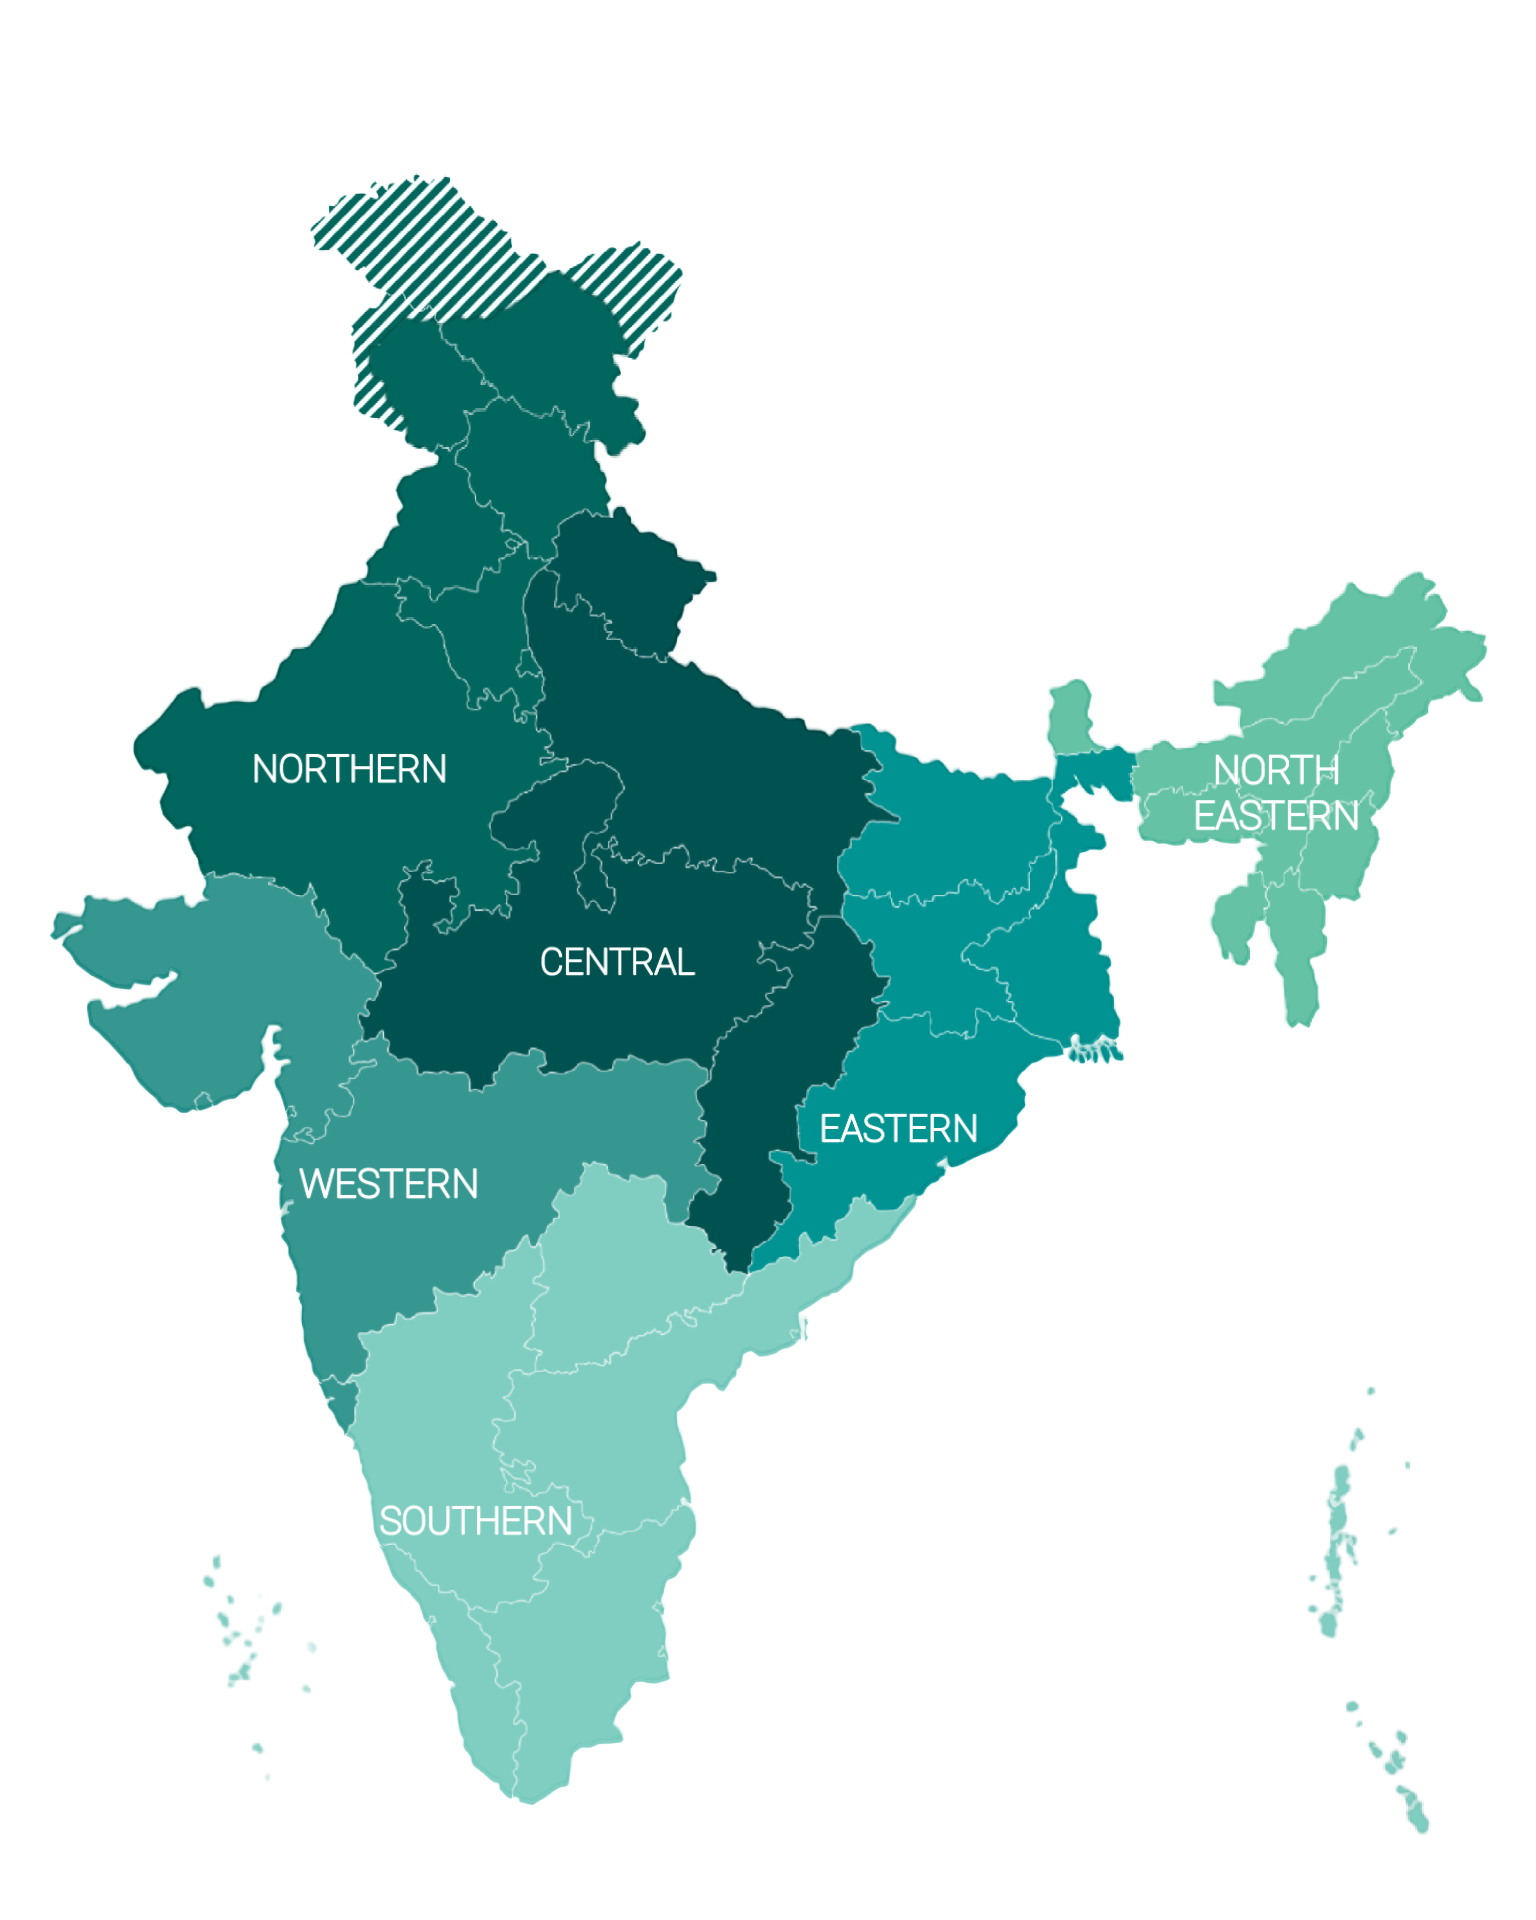

In [97]:
regions = {
    'Northern': ['Chandigarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh', 'Punjab', 'Rajasthan'],
    'North_Eastern': ['Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura', 'Sikkim'],
    'Central': ['Chhattisgarh', 'Madhya Pradesh', 'Uttarakhand', 'Uttar Pradesh'],
    'Eastern': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal'],
    'Western': ['Dadra and Nagar Haveli and Daman and Diu', 'Goa', 'Gujarat', 'Maharashtra'],
    'Southern': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry', 'Tamil Nadu', 'Telangana']
}


In [98]:
state_to_region = {state: region for region, states in regions.items() for state in states}
results['Region'] = results['State'].map(state_to_region)

In [99]:
results.head()

,Parliamentary Constituency,PC_no,State,Winning Candidate,Party,Total_electors,Total_votes,Turnout,Margin,Margin_Percent,Alliance,Region
0,Adilabad,1,Telangana,Godam Nagesh,Bharatiya Janta Party,1650175.0,1235597.0,74.9,90652.0,7.3,NDA,Southern
1,Agra,18,Uttar Pradesh,Prof S P Singh Baghel,Bharatiya Janta Party,2072685.0,1123779.0,54.2,271294.0,24.1,NDA,Central
2,Ahmadnagar,37,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party – Sharadchandra Pawar,1981866.0,1325477.0,66.9,28929.0,2.2,INDIA,Western
3,Ahmedabad East,7,Gujarat,Hasmukhbhai Patel (H.S.PATEL),Bharatiya Janta Party,2038162.0,1128339.0,55.4,461755.0,40.9,NDA,Western
4,Ahmedabad West,8,Gujarat,Dineshbhai Makwana (ADVOCATE),Bharatiya Janta Party,1726987.0,966646.0,56.0,286437.0,29.6,NDA,Western


In [100]:
seats_by_region = results.groupby('Region').size()
print(seats_by_region)

Region
Central          125
Eastern          117
North_Eastern     25
Northern          66
Southern         129
Western           76
dtype: int64


<ipython-input-101-d197185bd778>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_by_region.index, y=seats_by_region.values,palette="icefire")


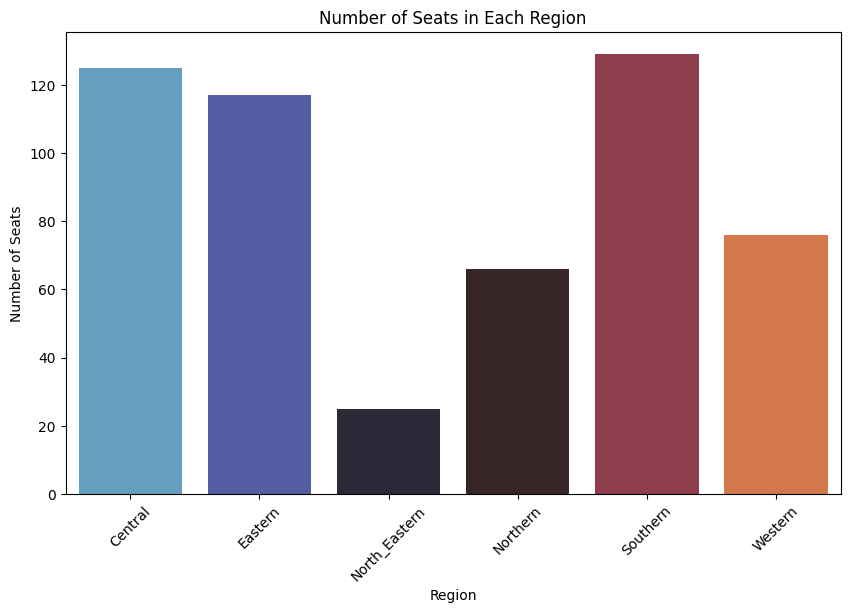

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=seats_by_region.index, y=seats_by_region.values,palette="icefire")
plt.title('Number of Seats in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.show()

In [102]:
##NORTH:
seats_in_north= results[results['Region']=='Northern']
seats_north_alliance= seats_in_north.groupby('Alliance').size()
print(seats_north_alliance)

Alliance
INDIA    29
NDA      32
Other     5
dtype: int64


<ipython-input-103-895a9b45bf49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_north_alliance.index, y=seats_north_alliance.values,palette="bright")


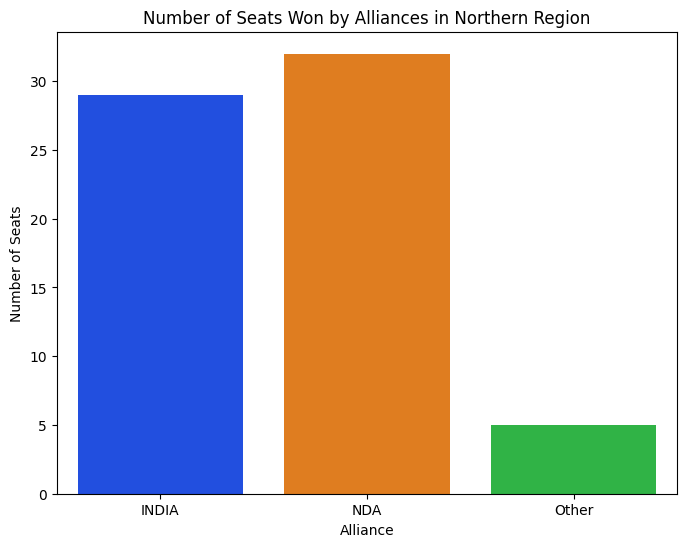

In [103]:
plt.figure(figsize=(8, 6))
sns.barplot(x=seats_north_alliance.index, y=seats_north_alliance.values,palette="bright")
plt.title('Number of Seats Won by Alliances in Northern Region')
plt.xlabel('Alliance')
plt.ylabel('Number of Seats')
plt.show()

In [104]:
##North East:
seats_in_northeast= results[results['Region']=='North_Eastern']
seats_northeast_alliance= seats_in_north.groupby('Alliance').size()
print(seats_northeast_alliance)


Alliance
INDIA    29
NDA      32
Other     5
dtype: int64


<ipython-input-105-1ed485fff565>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_northeast_alliance.index, y=seats_northeast_alliance.values,palette="bright")


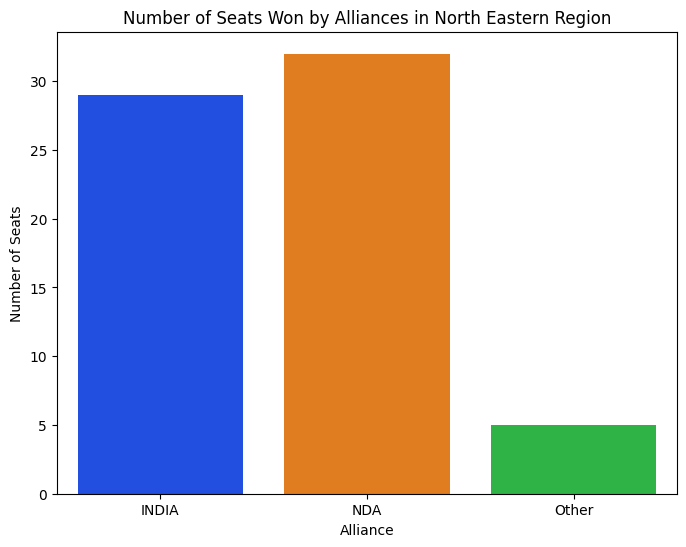

In [105]:

plt.figure(figsize=(8, 6))
sns.barplot(x=seats_northeast_alliance.index, y=seats_northeast_alliance.values,palette="bright")
plt.title('Number of Seats Won by Alliances in North Eastern Region')
plt.xlabel('Alliance')
plt.ylabel('Number of Seats')
plt.show()

In [106]:
##Central:
seats_in_central= results[results['Region']=='Central']
seats_n_alliance= seats_in_central.groupby('Alliance').size()
print(seats_north_alliance)


Alliance
INDIA    29
NDA      32
Other     5
dtype: int64


<ipython-input-107-85a98358710b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_central_alliance.index, y=seats_central_alliance.values,palette="bright")


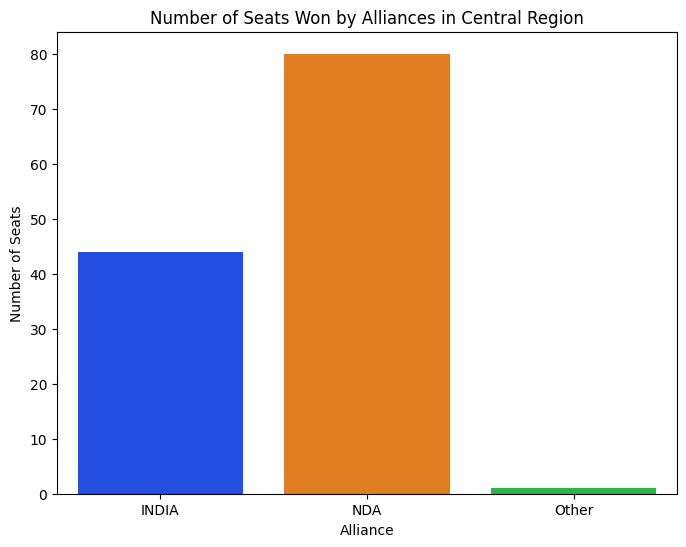

In [107]:
plt.figure(figsize=(8, 6))
sns.barplot(x=seats_central_alliance.index, y=seats_central_alliance.values,palette="bright")
plt.title('Number of Seats Won by Alliances in Central Region')
plt.xlabel('Alliance')
plt.ylabel('Number of Seats')
plt.show()

In [108]:
##Western:
seats_in_western= results[results['Region']=='Western']
seats_western_alliance= seats_in_western.groupby('Alliance').size()
print(seats_western_alliance)

Alliance
INDIA    32
NDA      43
Other     1
dtype: int64


<ipython-input-109-67f61f52abc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_western_alliance.index, y=seats_western_alliance.values,palette="bright")


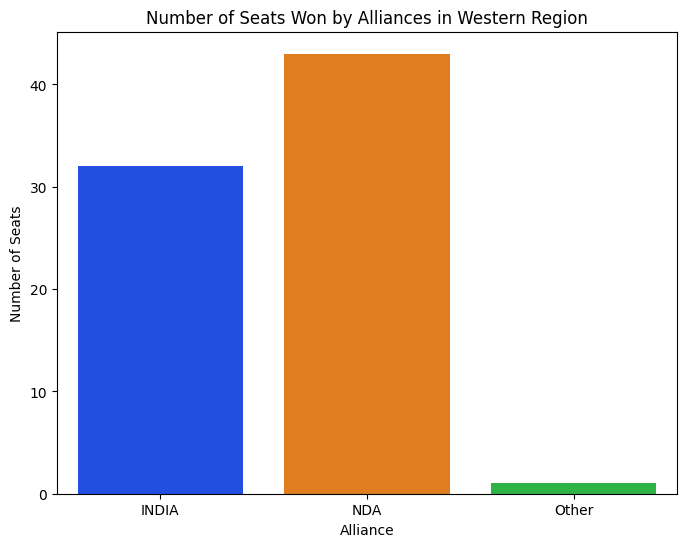

In [109]:
plt.figure(figsize=(8, 6))
sns.barplot(x=seats_western_alliance.index, y=seats_western_alliance.values,palette="bright")
plt.title('Number of Seats Won by Alliances in Western Region')
plt.xlabel('Alliance')
plt.ylabel('Number of Seats')
plt.show()

In [110]:
##Eastern:
seats_in_eastern= results[results['Region']=='Eastern']
seats_eastern_alliance= seats_in_eastern.groupby('Alliance').size()
print(seats_eastern_alliance)

Alliance
INDIA    45
NDA      71
Other     1
dtype: int64


<ipython-input-111-7b4055aaf168>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_eastern_alliance.index, y=seats_eastern_alliance.values,palette="bright")


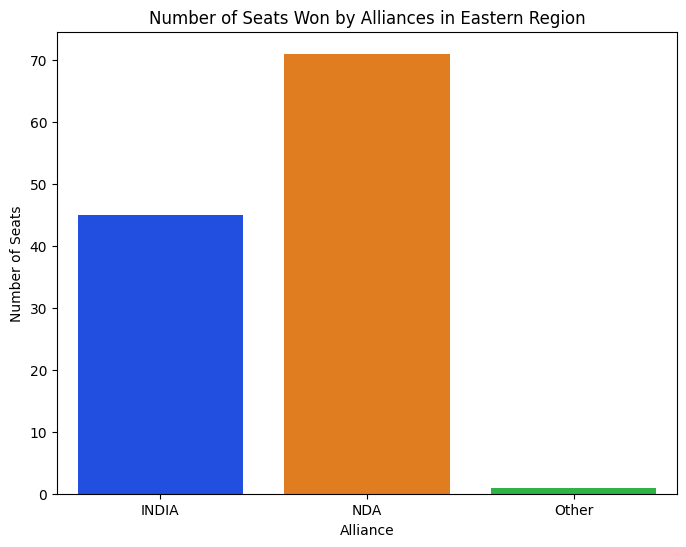

In [111]:
plt.figure(figsize=(8, 6))
sns.barplot(x=seats_eastern_alliance.index, y=seats_eastern_alliance.values,palette="bright")
plt.title('Number of Seats Won by Alliances in Eastern Region')
plt.xlabel('Alliance')
plt.ylabel('Number of Seats')
plt.show()

In [112]:
##South:
seats_in_south= results[results['Region']=='Southern']
seats_south_alliance= seats_in_south.groupby('Alliance').size()
print(seats_south_alliance)

Alliance
INDIA    75
NDA      49
Other     5
dtype: int64


<ipython-input-113-aaaa17a08410>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_south_alliance.index, y=seats_south_alliance.values,palette="bright")


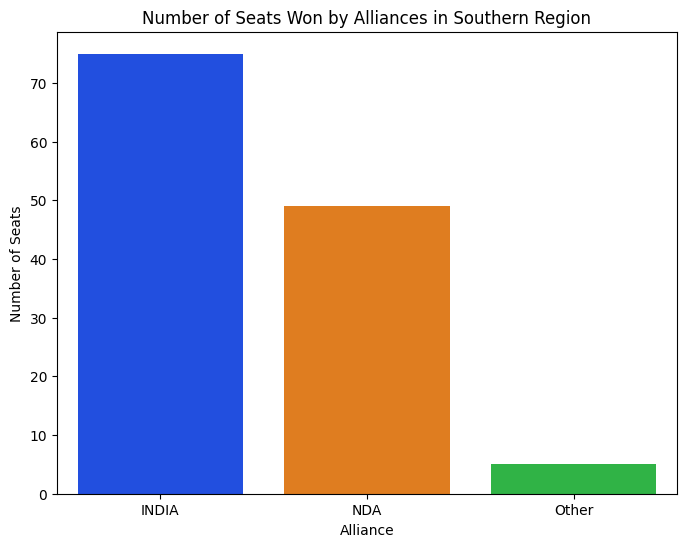

In [113]:
plt.figure(figsize=(8, 6))
sns.barplot(x=seats_south_alliance.index, y=seats_south_alliance.values,palette="bright")
plt.title('Number of Seats Won by Alliances in Southern Region')
plt.xlabel('Alliance')
plt.ylabel('Number of Seats')
plt.show()